## **Bidirectional LSTM (BiLSTM) in RNN**

A Bidirectional Long Short-Term Memory (BiLSTM) is an advanced type of Recurrent Neural Network (RNN) that enhances the capabilities of a standard LSTM by processing input sequences in both forward and backward directions.

**A Bidirectional LSTM (BiLSTM) is used instead of a simple LSTM when context from both past and future in a sequence matters.**

#### Key Features of BiLSTM
🔹Dual Directionality: Unlike unidirectional LSTMs, BiLSTMs process the sequence twice:

* Forward pass: Processes the input from the beginning to the end.
* Backward pass: Processes the input from the end to the beginning.

🔹Contextual Understanding: By combining outputs from both directions, BiLSTMs can better understand the relationships between words or elements in a sequence.

🔹Applications: Commonly used in Natural Language Processing (NLP) tasks like:
* Named Entity Recognition (NER)
* Machine Translation
* Sentiment Analysis
* Speech Recognition

**Example in NLP
For a sentence like "The cat sat on the mat," a BiLSTM can understand:**

**The word "bank" in**

**"I deposited money at the bank"**

**"I sat on the river bank"**

**→ Needs future words to clarify meaning.**

🔹 When NOT to use BiLSTM

* Real-time predictions (e.g., speech recognition as you talk, stock price prediction).

  Because BiLSTM requires future input which may not be available.

* Long sequences – Double computation since it trains two LSTMs.

👉 **In short:**

Use LSTM when only past matters (like time series forecasting).

Use BiLSTM when past + future context improves understanding (like NLP tasks).



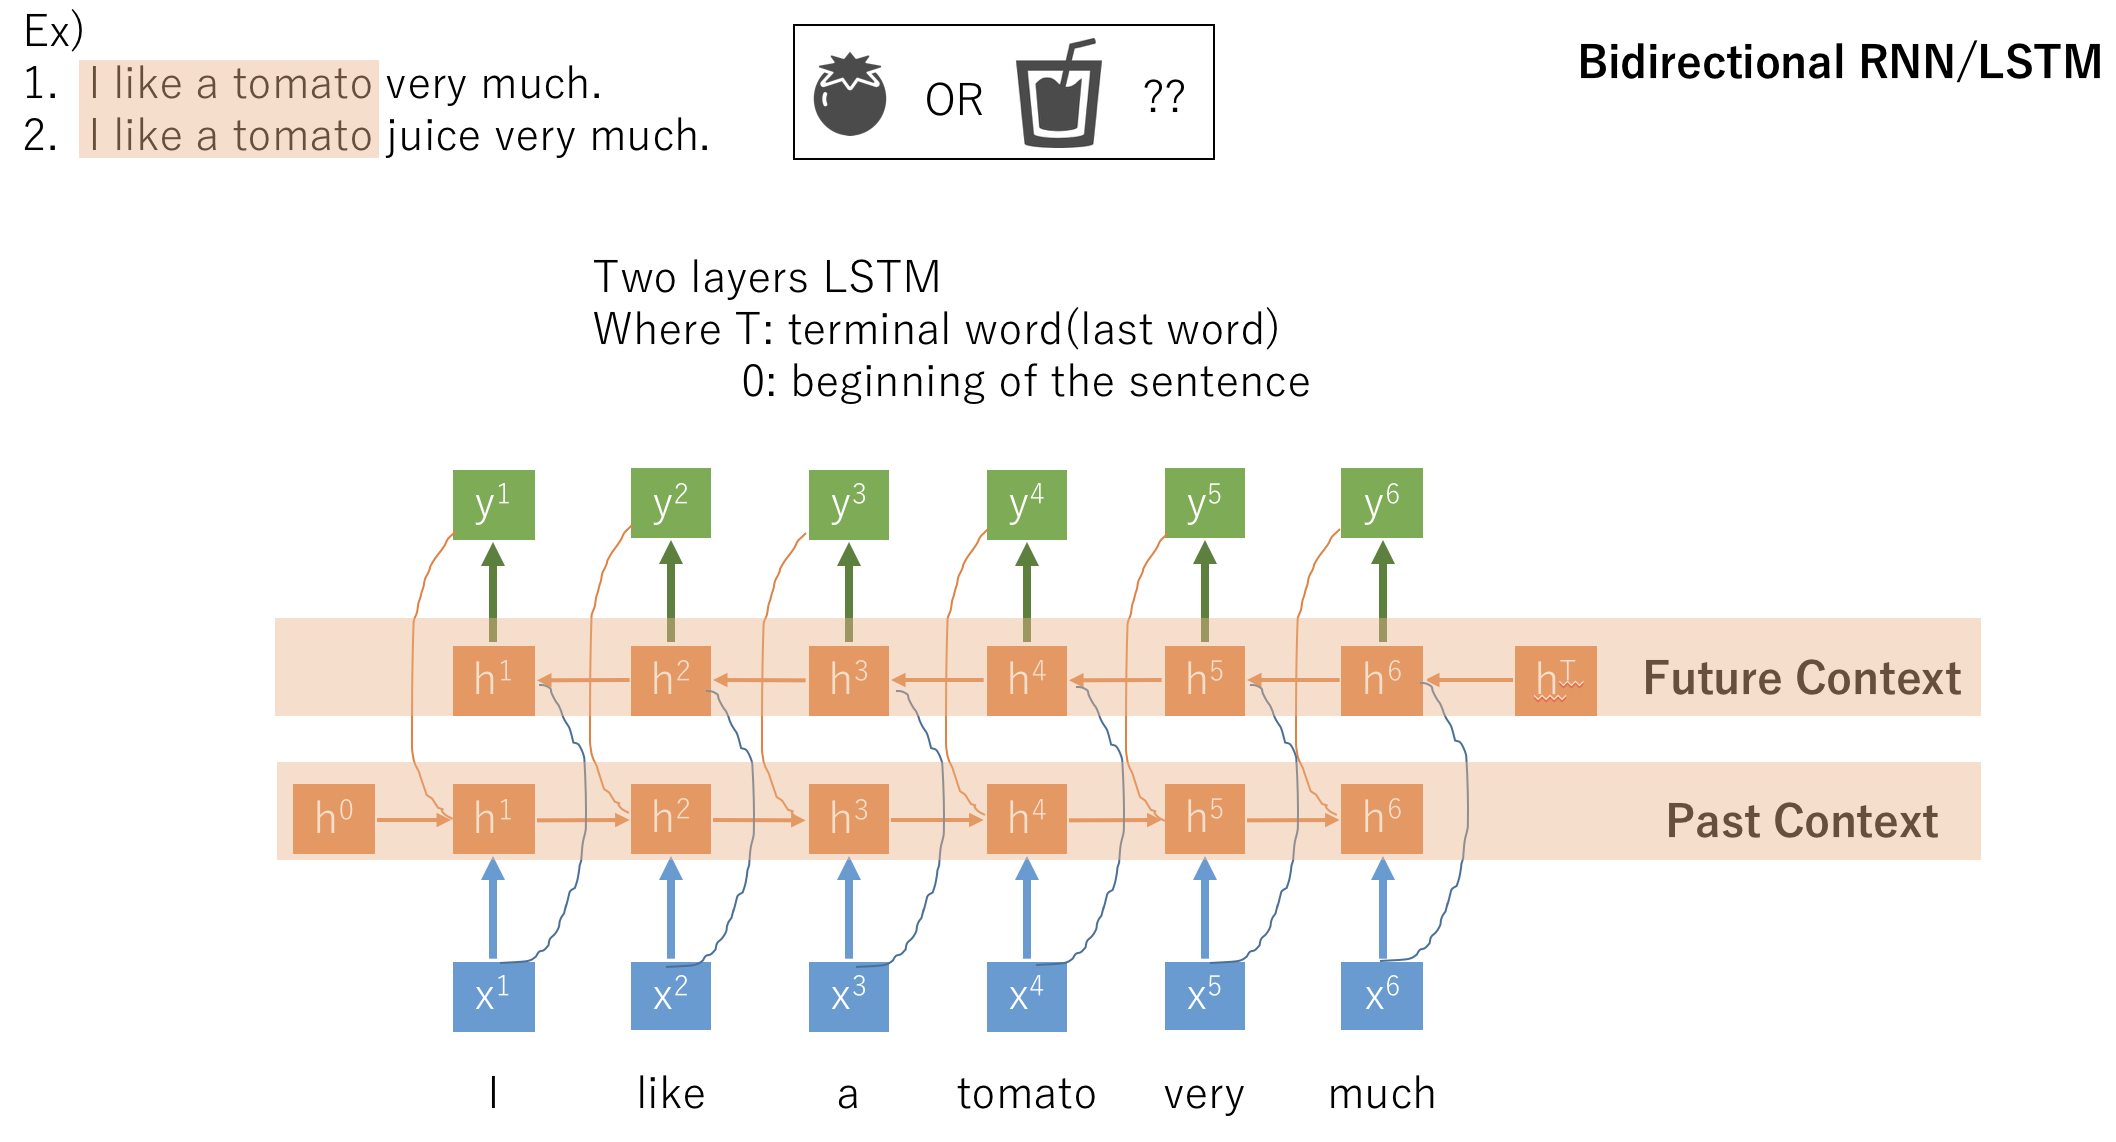

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense

# Example parameters
vocab_size = 5000     # size of vocabulary
embedding_dim = 50  # word embedding dimension
max_length = 100      # max length of input sequences

# Build model
model = Sequential()

# Embedding layer (input: word indexes, output: dense vectors)
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_shape=(max_length,)))

# Bidirectional LSTM layer
model.add(Bidirectional(LSTM(units=64)))

# Fully connected output layer
model.add(Dense(1, activation='sigmoid'))  # binary classification (e.g., positive/negative)

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model.summary()

# Example dummy data for demonstration
X = np.random.randint(0, vocab_size, (200, max_length))  # 200 samples
y = np.random.randint(0, 2, 200)  # binary labels

# Train model
model.fit(X, y, batch_size=32, epochs=10, validation_split=0.2)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 100, 50)        │       250,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 128)            │        58,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 309,009 (1.18 MB)

 Trainable params: 309,009 (1.18 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 227ms/step - accuracy: 0.4647 - loss: 0.6941 - val_accuracy: 0.6000 - val_loss: 0.6890
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.5423 - loss: 0.6864 - val_accuracy: 0.6250 - val_loss: 0.6892
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.8949 - loss: 0.6720 - val_accuracy: 0.5750 - val_loss: 0.6874
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 1.0000 - loss: 0.6412 - val_accuracy: 0.5750 - val_loss: 0.6822
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.9708 - loss: 0.5614 - val_accuracy: 0.6250 - val_loss: 0.6582
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.9923 - loss: 0.3608 - val_accuracy: 0.6000 - val_loss: 0.9238
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.9872 - loss: 0.1297 - val_accuracy: 0.5250 - val_loss: 1.2725
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 219ms/step - accuracy: 0.9979 - loss: 0.0591 - val_accuracy: 0.6250 - val_loss: